In [96]:
%matplotlib ipympl
from impedance.models.circuits import CustomCircuit
from impedance.models.circuits.elements import element
from impedance.visualization import plot_nyquist, plot_bode
import numpy as np
import matplotlib.pyplot as plt
import os
import shutil
from matplotlib.ticker import FormatStrFormatter, StrMethodFormatter
import pandas as pd
from scipy import stats

In [97]:
@element(num_params=4, units=["Ohm","Ohm", "F", ""],overwrite=True)
def TLMuni(p, f):
    omega = 2 * np.pi * np.array(f)
    R, Rion, RionQ, alpha = p[0], p[1], p[2], p[3]
    S=RionQ*(1j*omega)**alpha
    Z= R+2*Rion*np.sqrt(1/(S))*(1/(np.tanh(np.sqrt(S))))
    return Z

@element(num_params=4, units=["Ohm","Ohm", "F", ""],overwrite=True)
def TLMuniEC(p, f):
    omega = 2 * np.pi * np.array(f)
    R, Rion, RionQ, alpha = p[0], p[1], p[2], p[3]
    S=(1j*omega*RionQ)**alpha
    Z= R+2*Rion*np.sqrt(1/(S))*(1/(np.tanh(np.sqrt(S))))
    return Z

In [98]:
exp_data=pd.read_excel("abhi experimental through plane data.xlsx",header=None)
exp_data=exp_data.to_numpy()
z_exp_data=exp_data[:,1]+1j*exp_data[:,2]
freq_exp_data=exp_data[:,0]
#freq_exp_data

In [104]:
c_abhi_data=CustomCircuit(initial_guess=[41,1000,1,0.8],circuit="TLMuni")
c_EC=CustomCircuit(initial_guess=[41,1000,1,0.8],circuit="TLMuniEC")
c_pred=c_abhi_data.fit(freq_exp_data,z_exp_data,bounds=[(0,0,0,0),(np.inf,np.inf,np.inf,1)])
c_pred_EC=c_EC.fit(freq_exp_data,z_exp_data,bounds=[(0,0,0,0),(np.inf,np.inf,np.inf,1)])

c_pred.parameters_
c_pred_EC.parameters_

C:\Users\admin\AppData\Local\Temp\ipykernel_53464\2802938116.py:6: RuntimeWarning: overflow encountered in tanh
  Z= R+2*Rion*np.sqrt(1/(S))*(1/(np.tanh(np.sqrt(S))))
C:\Users\admin\AppData\Local\Temp\ipykernel_53464\2802938116.py:14: RuntimeWarning: overflow encountered in tanh
  Z= R+2*Rion*np.sqrt(1/(S))*(1/(np.tanh(np.sqrt(S))))


array([ 42.0062546 , 253.57062137,   0.93623326,   0.86405651])

C:\Users\admin\AppData\Local\Temp\ipykernel_53464\761369868.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fg, ax=plt.subplots()


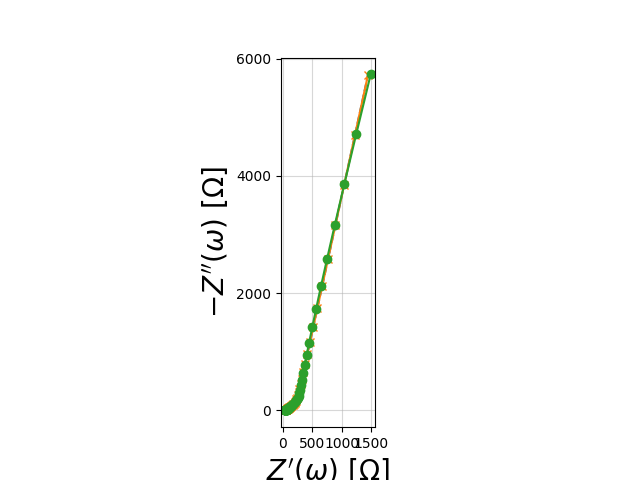

In [105]:
plt.close()
z_pred=c_pred.predict(freq_exp_data)
z_pred_EC=c_pred_EC.predict(freq_exp_data)
fg, ax=plt.subplots()
plot_nyquist(z_pred,ax=ax,fmt="--",ms="2")
plot_nyquist(z_pred_EC,ax=ax,fmt="-x")
plot_nyquist(z_exp_data,ax=ax,fmt="-o")
plt.show()